# <span style = "color:Orange; font-size:40px"> Face Mask</span>

### Import necessary Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import glob

### Read all the file names

In [5]:
with_mask = glob.glob('train_data/with_mask 1/with_mask 1/*.jpg')
without_mask = glob.glob('train_data/without_mask/without_mask/*.jpg')
with_mask_test = glob.glob('test_data/with_mask 1/with_mask 1/*.jpg')
without_mask_test = glob.glob('test_data/without_mask/without_mask/*.jpg')

In [6]:
len(with_mask)

1696

In [7]:
len(without_mask)

1792

In [8]:
len(with_mask_test)

1696

In [9]:
len(without_mask_test)

1792

### Test Data

In [11]:
# Test

image_test = []
label_test = []

for i in with_mask_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in without_mask_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

### Train Data

In [13]:
# Train

image = []
label = []

for i in with_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in without_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

In [14]:
len(with_mask)

1696

### Shuffle both image list and label list (In both Training and testing set)

In [16]:
# Train shuffle
image, label = shuffle(image, label, random_state=100)

In [17]:
# Test shuffle
image_test, label_test = shuffle(image_test, label_test, random_state=100)

In [18]:
pwd

'C:\\Users\\DELL\\Desktop\\Edure\\Shefin\\Capstone Projects\\Deep Learning\\Deep learning Capstone projects\\Deep learning Capstone projects\\Face Mask'

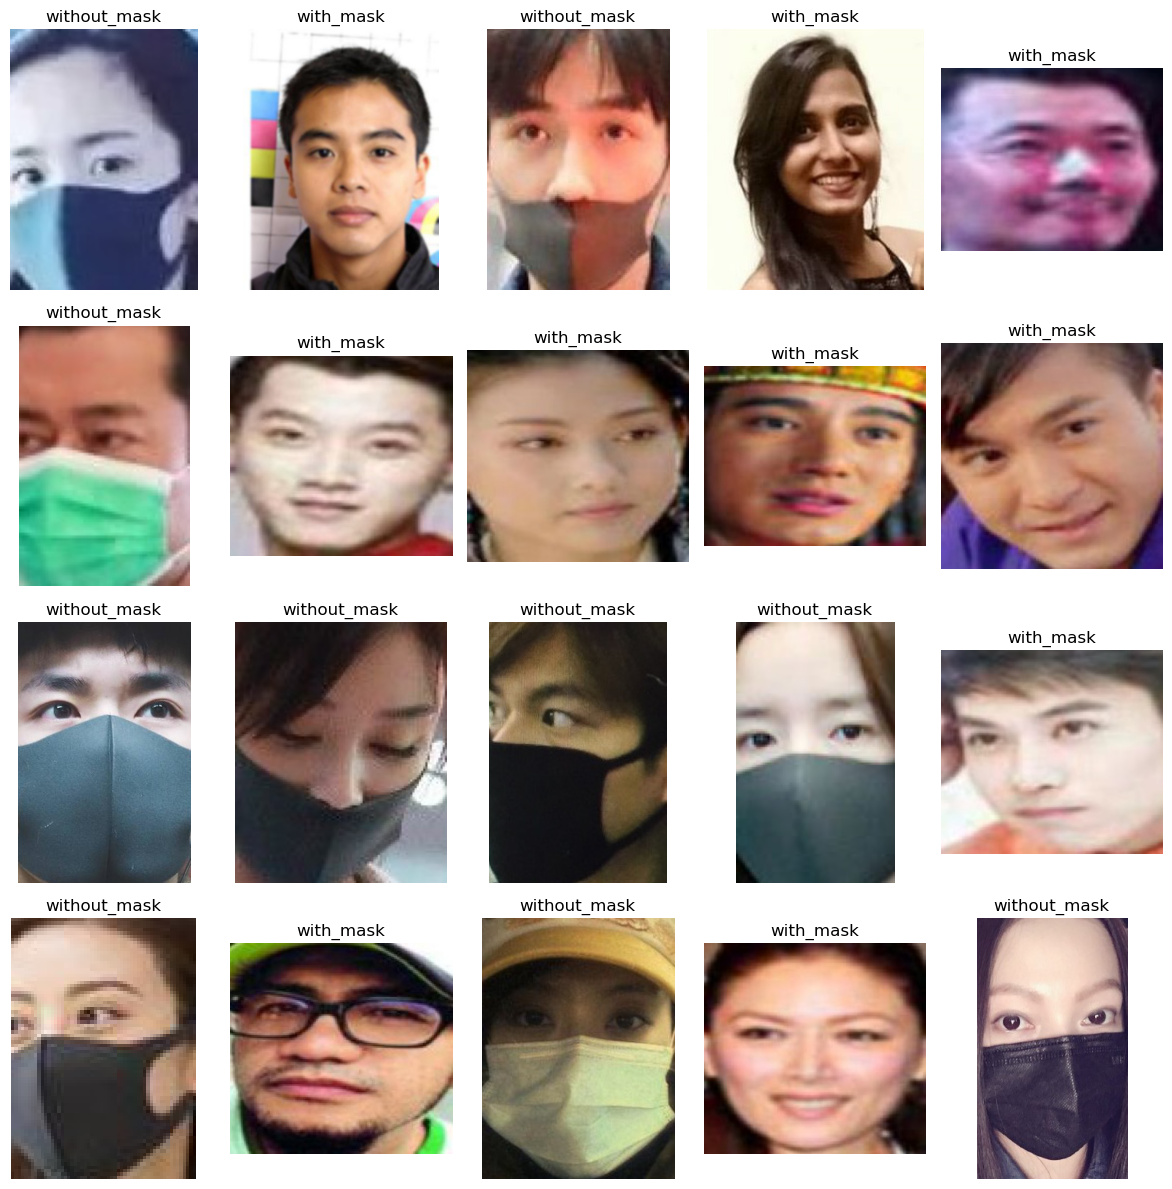

In [27]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.axis('off')    
    plt.tight_layout()

In [29]:
image

[array([[[126, 171, 204],
         [129, 174, 207],
         [129, 172, 206],
         ...,
         [133, 172, 211],
         [121, 165, 204],
         [128, 173, 215]],
 
        [[119, 164, 197],
         [118, 161, 195],
         [137, 178, 210],
         ...,
         [140, 178, 215],
         [146, 188, 228],
         [148, 193, 235]],
 
        [[119, 159, 194],
         [129, 169, 204],
         [163, 202, 235],
         ...,
         [108, 143, 181],
         [138, 177, 218],
         [147, 189, 231]],
 
        ...,
 
        [[ 57,  68,  96],
         [ 29,  43,  70],
         [ 36,  52,  78],
         ...,
         [ 40,  41,  62],
         [ 39,  40,  61],
         [ 41,  42,  63]],
 
        [[ 38,  49,  77],
         [ 34,  45,  73],
         [ 29,  43,  70],
         ...,
         [ 36,  37,  58],
         [ 37,  38,  58],
         [ 40,  41,  61]],
 
        [[ 30,  41,  69],
         [ 30,  41,  69],
         [ 26,  37,  65],
         ...,
         [ 37,  38,  58],
  

### Resize both training and test data

In [31]:
# train resize
x_train = []
for i in image:
    x_train.append(resize(i,(64,64,3)))
x_train = np.array(x_train)

In [32]:
# test resize

x_test = []
for i in image:
    x_test.append(resize(i,(64,64,3)))

# Array Format

x_test = np.array(x_test)

### Create numpy arrays named y_train and y_test from our training and testing label lists 

In [34]:
y_train = np.array(label)
y_test = np.array(label_test)

### Plot some of our reshaped images

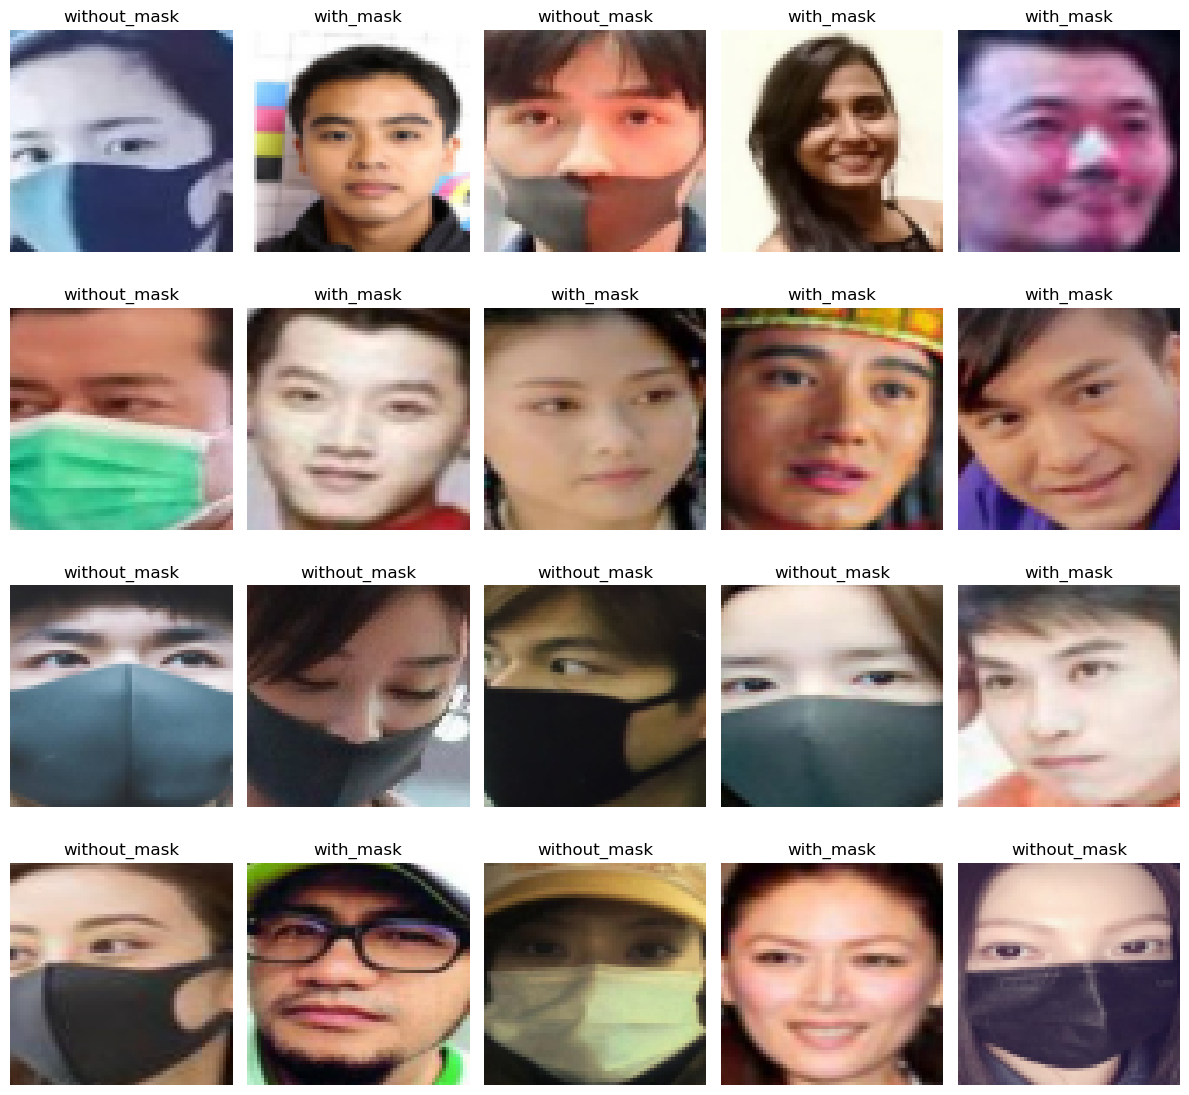

In [36]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_train[i])
    if label[i] == 1:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.axis('off')    
    plt.tight_layout()

### Creating the model

In [38]:
# CNN Model
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [40]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Model Summary

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [45]:
model.fit(x_train, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 31s 230ms/step - accuracy: 0.8243 - loss: 0.3820 - val_accuracy: 0.9284 - val_loss: 0.2188
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9170 - loss: 0.2195 - val_accuracy: 0.9570 - val_loss: 0.1232
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9390 - loss: 0.1637 - val_accuracy: 0.9542 - val_loss: 0.1217
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9454 - loss: 0.1495 - val_accuracy: 0.9742 - val_loss: 0.0922
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9617 - loss: 0.1146 - val_accuracy: 0.9713 - val_loss: 0.0912
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9688 - loss: 0.0816 - val_accuracy: 0.9685 - val_loss: 0.0742
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9695 - loss: 0.0845 - val_accuracy: 0.9799 - val_loss: 0.0711
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.9837 - loss: 0.0472 - val_accuracy: 0.9799

### Evaluate the model

In [47]:
# Evaluating the model

model.evaluate(x_train, y_train)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9945 - loss: 0.0241


[0.030338842421770096, 0.9928325414657593]

### Predict the model

In [49]:
# Predicting
prediction = model.predict(x_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [50]:
prediction

array([[4.8931628e-02],
       [9.9985719e-01],
       [2.8364020e-05],
       ...,
       [9.9882376e-01],
       [9.9919438e-01],
       [1.8954692e-02]], dtype=float32)

In [87]:
prediction
pred= []
for i in prediction:
    if i < 0.5:
        pred.append(0)
    else:
        pred.append(1)

In [88]:
pred

[0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,


### Plot X_test with label from our prediction

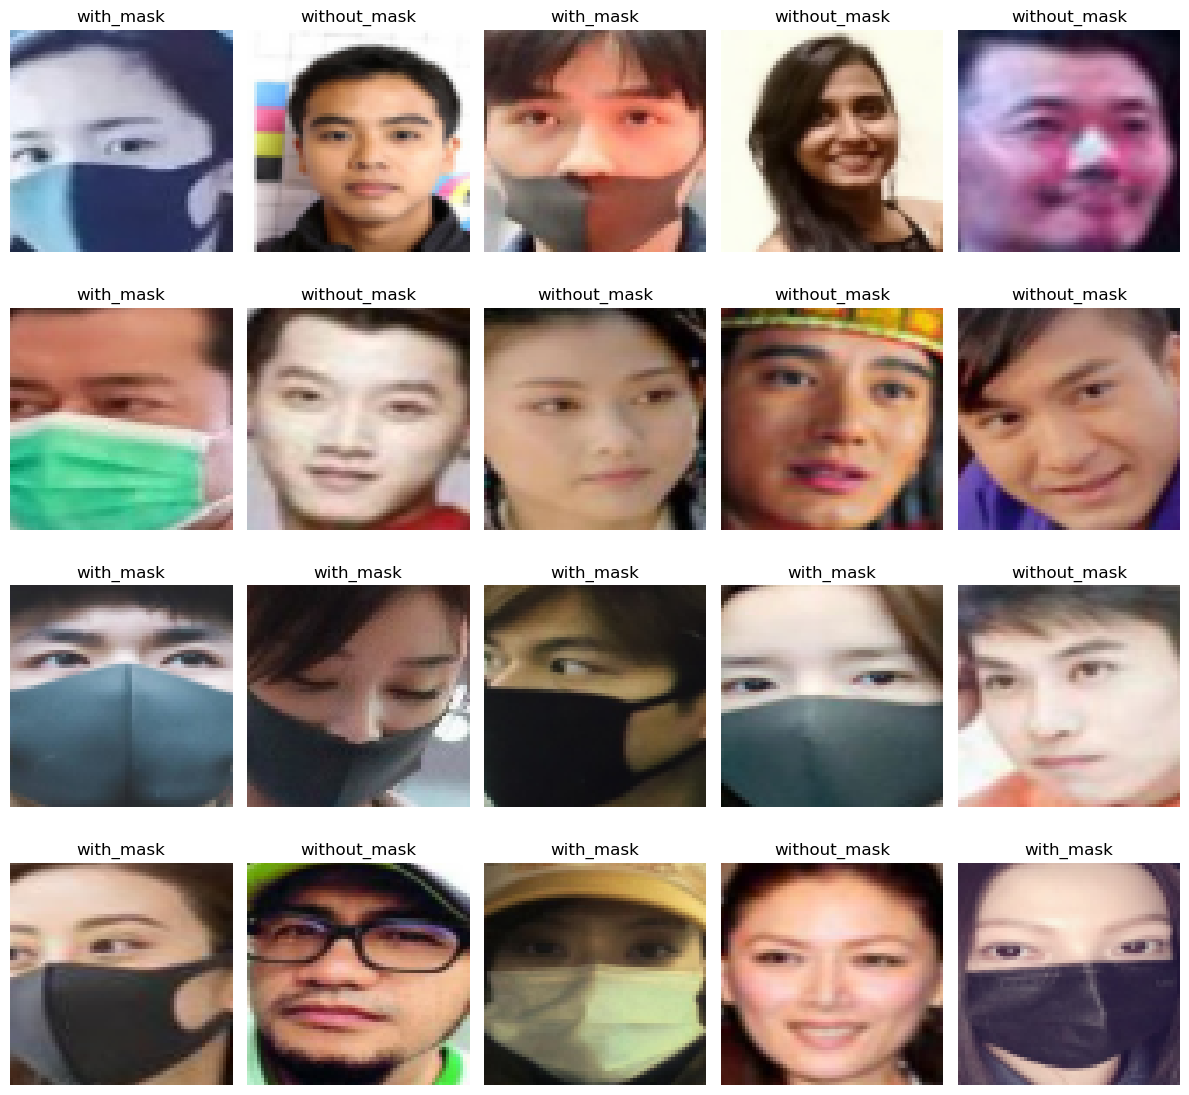

In [92]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i])
    if pred[i] == 0:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.axis('off')    
    plt.tight_layout()

### Visualise confusion matrix on a heatmap

In [95]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<Axes: >

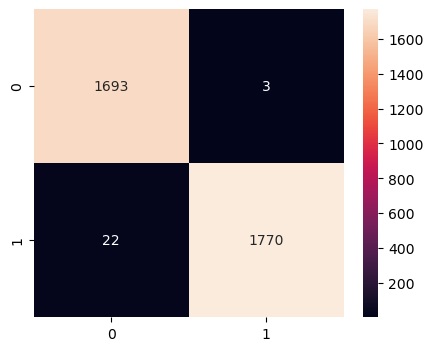

In [96]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d')

In [98]:
print(confusion_matrix(y_test,pred))

[[1693    3]
 [  22 1770]]


In [99]:
accuracy_score(y_test,pred)

0.9928325688073395

***